In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from time import time
from pathlib import Path

In [2]:
# Defining figure parameters
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [4, 3.3],
    'axes.labelsize': 12,
    #'axes.titlesize':14,
    'font.size': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.axisbelow': True,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
}
plt.rcParams.update(params)

In [3]:
def printarResultado(matrizProbabilidadeDeteccao, matrizConfusao, rangePotEspiao, rangeSNRs, qtdUsuarios, qtdAntenas, qtdSimbolos, descricao, acuracia, precisao, revocacao, tempoMedio, tempoDesvio):
    
    # Figure name
    titulo  = descricao
    titulo += "_Users(" + str(qtdUsuarios) + ")_Antennas(" + str(qtdAntenas) + ")_Symbols(" + str(qtdSimbolos) + ")"
    #titulo += "_Accuracy(" + str(acuracia)[:7] + ")_Precision(" + str(precisao)[:7] + ")_Recall(" + str(revocacao)[:7] + ")"
    titulo = titulo.replace(" ", "_")
    print(titulo)
    
    # Detection probabilities
    for i in range(len(rangePotEspiao)):
        plt.plot(rangeSNRs, matrizProbabilidadeDeteccao[i], label="$ P_{e} = $ "+str(rangePotEspiao[i]))
    plt.xlabel("SNR")
    plt.ylabel("$ p_{d} $")
    plt.grid(alpha=0.5)
    plt.legend()
    
    # CRIANDO A MATRIZ DE CONFUSAO
    #axs[1].imshow(matrizConfusao, cmap="gray")
    #for (j,i), total in np.ndenumerate(matrizConfusao):
    #    axs[1].text(i, j, int(total), ha="center", va="center", color="#e6005c", size=15)
    #axs[1].set_xlabel("Predito")
    #axs[1].set_ylabel("Real")
    #axs[1].set_xticklabels([])
    #axs[1].set_yticklabels([])
    
    # PRINTANDO
    #plt.suptitle(titulo, y=1.15)
    path_name = "Figures/"
    fig_name = path_name + titulo + ".pdf"
    plt.savefig(fig_name, bbox_inches="tight")
    plt.show()

Deteccao_baseada_em_DecisionTreeClassifier_com_E_Users(1)_Antennas(256)_Symbols(128)


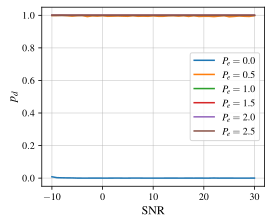

Deteccao_baseada_em_DecisionTreeClassifier_com_E_Users(2)_Antennas(256)_Symbols(128)


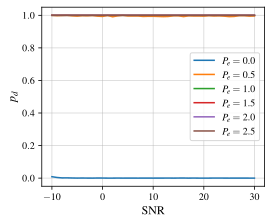

Deteccao_baseada_em_DecisionTreeClassifier_com_E_Users(4)_Antennas(256)_Symbols(128)


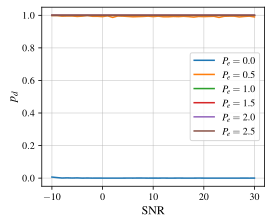

Deteccao_baseada_em_DecisionTreeClassifier_com_E_Users(8)_Antennas(256)_Symbols(128)


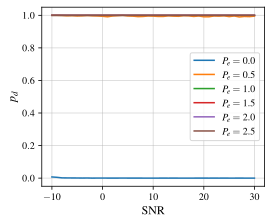

Deteccao_baseada_em_DecisionTreeClassifier_com_E_Users(16)_Antennas(256)_Symbols(128)


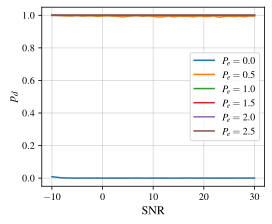

Deteccao_baseada_em_DecisionTreeClassifier_com_E_Users(32)_Antennas(256)_Symbols(128)


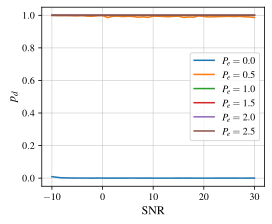

Deteccao_baseada_em_DecisionTreeClassifier_com_E_Users(64)_Antennas(256)_Symbols(128)


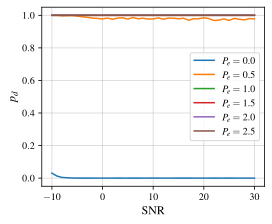

In [4]:
tecnicaDeteccao      = "tree" # svc, perceptron, linear, tree
featuresSelecionadas = ["E"] # Se usar "hassan", features tem que ser ["E", "eta"]

arquivoUltimosResultados = sorted(Path("../../Resultados/").glob("probabilidadeDeteccao_*.json"))[-1]
dictResultados = json.load(open(arquivoUltimosResultados))

for key, values in dictResultados.items():
    if tecnicaDeteccao.upper() in key.upper() and featuresSelecionadas == values["featuresSelecionadas"]:
        
        matrizProbabilidadeDeteccao = values["matrizProbabilidadeDeteccao"]
        matrizConfusao              = values["matrizConfusao"]
        rangePotEspiao              = values["rangePotEspiao"] 
        rangeSNRs                   = values["rangeSNRs"]
        qtdUsuarios                 = values["qtdUsuarios"]
        qtdAntenas                  = values["qtdAntenas"] 
        qtdSimbolos                 = values["qtdSimbolos"] 
        descricao                   = values["descricao"]
        acuracia                    = values["acuracia"]
        precisao                    = values["precisao"] 
        revocacao                   = values["revocacao"]
        tempoMedio                  = values["tempoMedioPredicao"]
        tempoDesvio                 = values["tempoDesvioPredicao"]
        
        printarResultado(matrizProbabilidadeDeteccao, matrizConfusao, rangePotEspiao, rangeSNRs, qtdUsuarios, qtdAntenas, qtdSimbolos, descricao, acuracia, precisao, revocacao, tempoMedio, tempoDesvio)

In [5]:
import os

os.listdir()

['.ipynb_checkpoints',
 'Comparacao-Prob-Deteccao-Com-E-Sem-ML.ipynb',
 'Data-Visualization-Elsevier.ipynb',
 'Feature-Importance-Autovalores.ipynb',
 'Figures',
 'Gerar-Resultados.ipynb',
 'Gridsearch.ipynb',
 'Probabilidade-Deteccao-Dataset-Hassel-Kapetanovic.ipynb',
 'Teste-Influencia-SNR-e-ETA.ipynb',
 'Tree-Classification-Hassel-and-Kapetanovic.ipynb',
 'Tree-Classification-Kapetanovic.ipynb',
 'Visualizacao-De-Dados.ipynb']